<a href="https://colab.research.google.com/github/jmhuer/Fall2021MusicResearch/blob/main/HarmonyReductionAndDecompostion/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usage Demo : 


In [2]:
# !rm -r python3_midi/
!sudo apt-get install libasound2-dev swig
# !pip3 install git+https://github.com/vishnubob/python-midi@feature/python3
!pip install git+https://github.com/vishnubob/python-midi@feature/python3
!pip install pretty_midi
!git clone https://github.com/jmhuer/mgeval


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,276 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf

In [418]:
import midi
import glob
import numpy as np
import pretty_midi
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval.mgeval import core, utils
from sklearn.model_selection import LeaveOneOut

In [419]:
# # %cd autoharmonyresults/rules/
# !unzip autoharmonyresults/rules/"*.zip" -d autoharmonyresults/rules/
# !unzip autoharmonyresults/kwtalifetime/"*.zip" -d autoharmonyresults/kwtalifetime/
# !unzip autoharmonyresults/ordinary/"*.zip" -d autoharmonyresults/ordinary/
# !unzip autoharmonyresults/kwta/"*.zip" -d autoharmonyresults/kwta/

# # !unzip /content/1.3kwta.zip
# # !unzip /content/1.5kwta.zip
# # !unzip /content/autoharmonyresults.zip
# # !unzip /content/.zip

## Absolute measurement: statistic analysis


Assign dataset path

In [468]:
# !mv /content/autoharmonyresults/ordinary/0.3kwta/* /content/ordinary/
# !mv /content/autoharmonyresults/ordinary/0.5kwta/* /content/ordinary/
# !mv /content/autoharmonyresults/ordinary/0.7kwta/* /content/ordinary/
# !mv /content/autoharmonyresults/ordinary/1.3kwta/* /content/ordinary/
# !mv /content/autoharmonyresults/ordinary/1.5kwta/* /content/ordinary/
# !mv /content/autoharmonyresults/ordinary/1.9kwta/* /content/ordinary/


# !mv /content/autoharmonyresults/rules/0.3rules/* /content/rules/
# !mv /content/autoharmonyresults/rules/0.5rules/* /content/rules/
# !mv /content/autoharmonyresults/rules/0.7rules/* /content/rules/
# !mv /content/autoharmonyresults/rules/1.3rules/* /content/rules/
# !mv /content/autoharmonyresults/rules/1.5rules/* /content/rules/
# !mv /content/autoharmonyresults/rules/1.9rules/* /content/rules/



#Eval features


In [775]:
feature1 = "total_used_pitch"

original data

In [776]:
set0 = glob.glob('/content/autoharmonyresults/kwtalifetime/1kwta/*')
# set0 = glob.glob('/content/original/*')

num_samples = len(set0)
set_eval0 = {feature1:np.zeros((num_samples,1))}
print(num_samples)

metrics_list = list(set_eval0.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set0[i])
    set_eval0[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

280


In [777]:
set1 = glob.glob('/content/autoharmonyresults/kwta/1.5kwta/*')
# set1 = glob.glob('/content/kwta/*')

num_samples = len(set1)
set_eval1 = {feature1:np.zeros((num_samples,1))}
print(num_samples)

metrics_list = list(set_eval1.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    set_eval1[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

280


repeat for second dataset

In [778]:
set2 = glob.glob('/content/autoharmonyresults/rules/1.9rules/*')
# set2 = glob.glob('/content/rules/*')

num_samples = len(set2)
set_eval2 = {feature1:np.zeros((num_samples,1))}
print(num_samples)


metrics_list = list(set_eval2.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    set_eval2[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

280


repeat for thirds dataset

In [779]:
set3 = glob.glob('/content/autoharmonyresults/kwtalifetime/1.5kwta/*')
# set3 = glob.glob('/content/kwtalifetime/*')

num_samples = len(set3)
set_eval3 = {feature1:np.zeros((num_samples,1))}
print(num_samples)

metrics_list = list(set_eval3.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set3[i])
    set_eval3[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

280


repeat for fourth dataset

In [780]:
set4 = glob.glob('/content/autoharmonyresults/ordinary/1.5kwta/*')
# set4 = glob.glob('/content/ordinary/*')

num_samples = len(set4)
set_eval4 = {feature1:np.zeros((num_samples,1))}
print(num_samples)

metrics_list = list(set_eval4.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set4[i])
    set_eval4[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

280


#statistic analysis: absolute measurement

In [781]:
print(len(metrics_list))

for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    
    print('------------------------')
    print(' demo_set0')
    print('  mean: ', np.mean(set_eval0[metrics_list[i]], axis=0))
    print('  std: ', np.std(set_eval0[metrics_list[i]], axis=0))

    print('------------------------')
    print(' demo_set1')
    print('  mean: ', np.mean(set_eval1[metrics_list[i]], axis=0))
    print('  std: ', np.std(set_eval1[metrics_list[i]], axis=0))

    print('------------------------')
    print(' demo_set2')
    print('  mean: ', np.mean(set_eval2[metrics_list[i]], axis=0))
    print('  std: ', np.std(set_eval2[metrics_list[i]], axis=0))

    print('------------------------')
    print(' demo_set3')
    print('  mean: ', np.mean(set_eval3[metrics_list[i]], axis=0))
    print('  std: ', np.std(set_eval3[metrics_list[i]], axis=0))

    print('------------------------')
    print(' demo_set4')
    print('  mean: ', np.mean(set_eval4[metrics_list[i]], axis=0))
    print('  std: ', np.std(set_eval4[metrics_list[i]], axis=0))



1
total_used_pitch:
------------------------
 demo_set0
  mean:  [27.06785714]
  std:  [6.65091581]
------------------------
 demo_set1
  mean:  [32.61428571]
  std:  [7.0153767]
------------------------
 demo_set2
  mean:  [38.92857143]
  std:  [7.33790828]
------------------------
 demo_set3
  mean:  [31.89285714]
  std:  [6.79200836]
------------------------
 demo_set4
  mean:  [33.16785714]
  std:  [7.01506306]


## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

#exhaustive cross-validation for intra-set distances measurement

#requires same number samples per folder


In [782]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set0_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set3_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set4_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        # print(train_index)
        set0_intra[test_index[0]][i] = utils.c_dist(set_eval0[metrics_list[i]][test_index], set_eval0[metrics_list[i]][train_index])
        set1_intra[test_index[0]][i] = utils.c_dist(set_eval1[metrics_list[i]][test_index], set_eval1[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set_eval2[metrics_list[i]][test_index], set_eval2[metrics_list[i]][train_index])
        set3_intra[test_index[0]][i] = utils.c_dist(set_eval3[metrics_list[i]][test_index], set_eval3[metrics_list[i]][train_index])
        set4_intra[test_index[0]][i] = utils.c_dist(set_eval4[metrics_list[i]][test_index], set_eval4[metrics_list[i]][train_index])



exhaustive cross-validation for inter-set distances measurement

#sets_inter 

In [783]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter0 = np.zeros((num_samples, len(metrics_list), num_samples))
sets_inter1 = np.zeros((num_samples, len(metrics_list), num_samples))
sets_inter2 = np.zeros((num_samples, len(metrics_list), num_samples))
sets_inter3 = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        # print(test_index)
        sets_inter0[test_index[0]][i] = utils.c_dist(set_eval0[metrics_list[i]][test_index], set_eval1[metrics_list[i]])
        sets_inter1[test_index[0]][i] = utils.c_dist(set_eval0[metrics_list[i]][test_index], set_eval2[metrics_list[i]])
        sets_inter2[test_index[0]][i] = utils.c_dist(set_eval0[metrics_list[i]][test_index], set_eval3[metrics_list[i]])
        sets_inter3[test_index[0]][i] = utils.c_dist(set_eval0[metrics_list[i]][test_index], set_eval4[metrics_list[i]])


In [790]:
#mean
print(np.mean(plot_set0_intra[i]))
print(np.mean(plot_set1_intra[i]))
print(np.mean(plot_set2_intra[i]))
print(np.mean(plot_set3_intra[i]), "\n")
#std
print(np.std(plot_set0_intra[i]))
print(np.std(plot_set1_intra[i]))
print(np.std(plot_set2_intra[i]))
print(np.std(plot_set3_intra[i]))

7.5340757808499745
7.915616999487967
8.290117767537122
7.649411162314388 

5.658989208475377
6.010559647976388
6.272936174578833
5.837803940730007


visualization of intra-set and inter-set distances



*   inter-set we compare 1 sample from harmny transofmotaion data with all others from original data 
*   inter set is between the same dataset



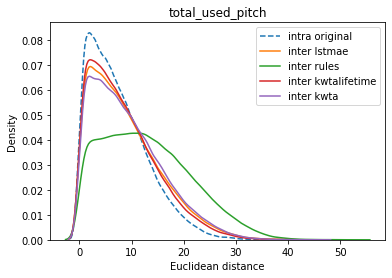

In [784]:
plot_set0_intra = np.transpose(set0_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set3_intra = np.transpose(set3_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set4_intra = np.transpose(set4_intra,(1, 0, 2)).reshape(len(metrics_list), -1)

plot_sets_inter0 = np.transpose(sets_inter0,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter1 = np.transpose(sets_inter1,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter2 = np.transpose(sets_inter2,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter3 = np.transpose(sets_inter3,(1, 0, 2)).reshape(len(metrics_list), -1)

for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set0_intra[i], label='intra original', linestyle='--')
    # sns.kdeplot(plot_set1_intra[i], label='lstmae')
    # sns.kdeplot(plot_set2_intra[i], label='rules')
    # # # sns.kdeplot(backup[i], label='1.3')
    # sns.kdeplot(plot_set3_intra[i], label='kwtalifetime')
    # sns.kdeplot(plot_set4_intra[i], label='kwta')
    sns.kdeplot(plot_sets_inter0[i], label='inter lstmae')
    sns.kdeplot(plot_sets_inter1[i], label='inter rules')
    sns.kdeplot(plot_sets_inter2[i], label='inter kwtalifetime')
    sns.kdeplot(plot_sets_inter3[i], label='inter kwta')
    
    plt.legend()
    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

#Kullback–Leibler Divergence

In [791]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set1')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set0_intra[i], plot_sets_inter0[i]))
    print('  Overlap area:', utils.overlap_area(plot_set0_intra[i], plot_sets_inter0[i]))
    
    print(' demo_set2')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set0_intra[i], plot_sets_inter1[i]))
    print('  Overlap area:', utils.overlap_area(plot_set0_intra[i], plot_sets_inter1[i]))

    print(' demo_set3')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set0_intra[i], plot_sets_inter2[i]))
    print('  Overlap area:', utils.overlap_area(plot_set0_intra[i], plot_sets_inter2[i]))

    print(' demo_set4')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set0_intra[i], plot_sets_inter3[i]))
    print('  Overlap area:', utils.overlap_area(plot_set0_intra[i], plot_sets_inter3[i]))   

total_used_pitch:
------------------------
 demo_set1
  Kullback–Leibler divergence: 0.0006801178197351956
  Overlap area: 0.8957286492387203
 demo_set2
  Kullback–Leibler divergence: 0.07105154627960795
  Overlap area: 0.6833360955860578
 demo_set3
  Kullback–Leibler divergence: 0.0003647491809508504
  Overlap area: 0.9168595342756171
 demo_set4
  Kullback–Leibler divergence: 0.003873642514040255
  Overlap area: 0.8759940480558963


In [ ]:
# import time 

# for i in range(1000):
#   time.sleep(10)